In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# PyTorch
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()
        self.relu4 = nn.ReLU()

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
USE_PRETRAINED_MODEL = True # if the model is not saved, set false

if USE_PRETRAINED_MODEL:
    print("Using existing trained model")
    from urllib.request import urlopen
    import os.path
    if os.path.isfile("models/cifar_torchvision.pt"):
        print("File found, will be loaded")    
        net.load_state_dict(torch.load('models/cifar_torchvision.pt'))
    else:
        print("Please train the model first by setting USE_PRETRAINED_MODEL to False")
else:
    for epoch in range(5):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')
    torch.save(net.state_dict(), 'models/cifar_torchvision.pt')

Using existing trained model
File found, will be loaded


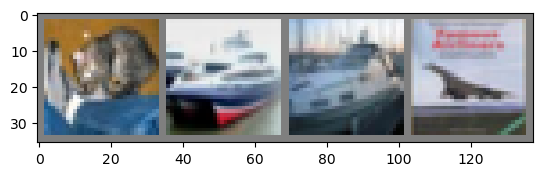

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car plane plane


In [6]:
def imshow(img, transpose = True):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [7]:
ind = 3

input = images[ind].unsqueeze(0)
input.requires_grad = True

In [8]:
net.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
  (relu4): ReLU()
)

EntryPoint(name='deepexplainer', value='feature_attributions_explainer:deep_explainer [backgroundimages,model,labels,targetimages]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='deeplift', value='feature_attributions_explainer:deeplift [model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='featureablation', value='feature_attributions_explainer:featureablation [model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='gradientexplainer', value='feature_attributions_explainer:gradient_explainer', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='integratedgradients', value='feature_attributions_explainer:integratedgradients [model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='kernelexplainer', value='feature_attributions_explainer:kernel_explainer [data,model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoin

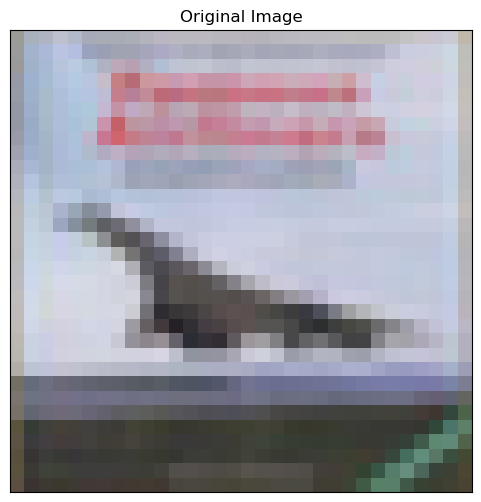

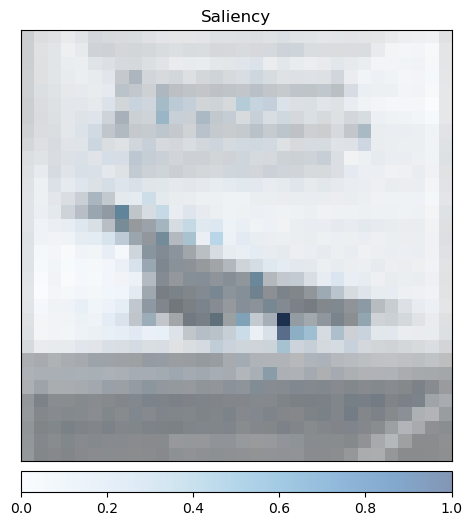

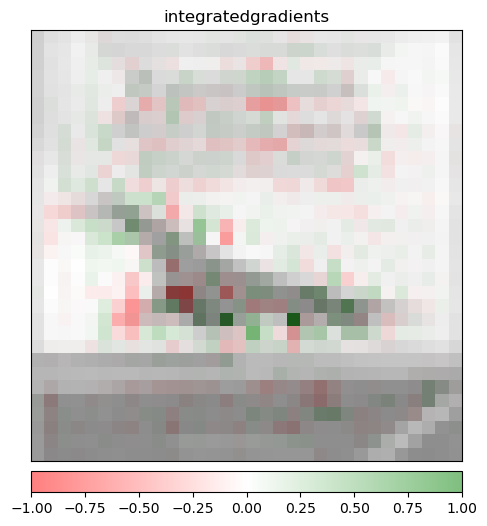

/localdisk/dylanlan/www/frameworks.ai.explainable-ai/explainer/explainer/explainers/feature_attributions_explainer/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


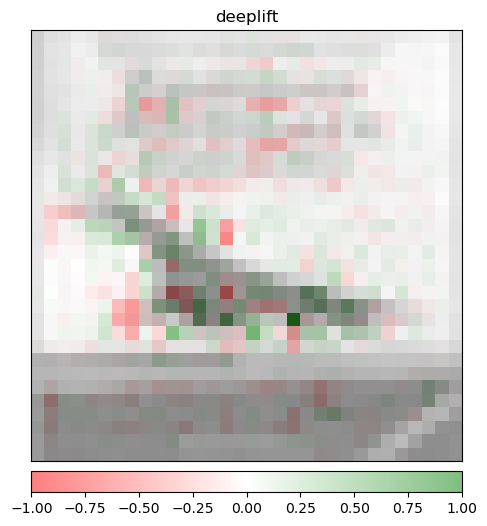

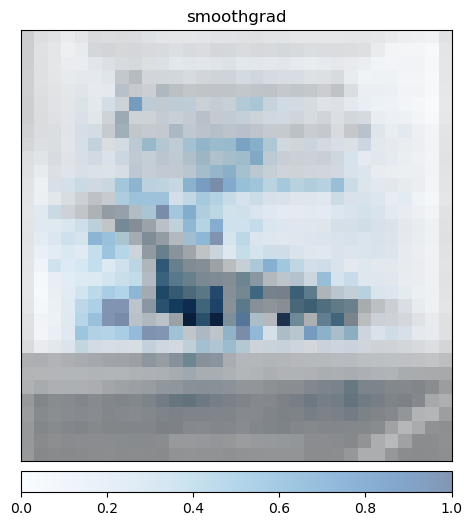

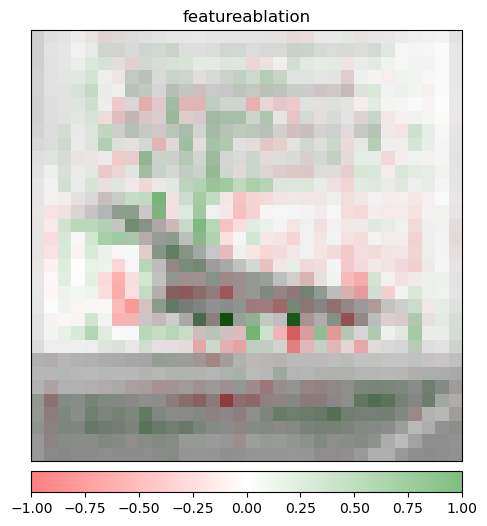

In [9]:
from explainer.explainers import feature_attributions_explainer
from captum.attr import visualization as viz
#feature_attributions_explainer.entry_points

# handeling Original Image
print('Original Image')
print('Predicted:', classes[predicted[ind]], ' Probability:', torch.max(F.softmax(outputs, 1)).item())
original_image = np.transpose((images[ind].cpu().detach().numpy() / 2) + 0.5, (1, 2, 0))
viz.visualize_image_attr(None, original_image, method="original_image", title="Original Image")

# Entry Points
feature_attributions_explainer['saliency'](net).visualize(input,labels[ind],original_image,"Saliency")
feature_attributions_explainer['integratedgradients'](net).visualize(input,labels[ind],original_image,"Integrated Gradients")
feature_attributions_explainer['deeplift'](net).visualize(input,labels[ind],original_image,"Deep Lift")
feature_attributions_explainer['smoothgrad'](net).visualize(input,labels[ind],original_image,"Smooth Grad")
feature_attributions_explainer['featureablation'](net).visualize(input,labels[ind],original_image,"Feature Ablation")
